In [1]:
corpus = ["我特别特别喜欢看电影",
          "这部电影真的是很好看的电影",
          "今天天气真好是难得的好天气",
          "我今天去看了一部电影",
          "电影院的电影都很好看"]

In [2]:
import jieba
corpus_tokenized = [list(jieba.cut(doc)) for doc in corpus]
print(corpus_tokenized)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/8q/d7x0f5_54lsbnsy2093ksff40000gn/T/jieba.cache
Loading model cost 0.379 seconds.
Prefix dict has been built successfully.


[['我', '特别', '特别', '喜欢', '看', '电影'], ['这部', '电影', '真的', '是', '很', '好看', '的', '电影'], ['今天天气', '真好', '是', '难得', '的', '好', '天气'], ['我', '今天', '去', '看', '了', '一部', '电影'], ['电影院', '的', '电影', '都', '很', '好看']]


In [3]:
#创建词汇表
word_dict = {}
for sentence in corpus_tokenized:
    for word in sentence:
        if word not in word_dict:
            word_dict[word] = len(word_dict)
print(word_dict)

{'我': 0, '特别': 1, '喜欢': 2, '看': 3, '电影': 4, '这部': 5, '真的': 6, '是': 7, '很': 8, '好看': 9, '的': 10, '今天天气': 11, '真好': 12, '难得': 13, '好': 14, '天气': 15, '今天': 16, '去': 17, '了': 18, '一部': 19, '电影院': 20, '都': 21}


In [4]:
#创建共现矩阵
bow_vector = []
for sentence in corpus_tokenized:
    sentence_vector = [0] * len(word_dict)
    for word in sentence:
        sentence_vector[word_dict[word]] += 1
    bow_vector.append(sentence_vector)
print(bow_vector)

[[1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


In [5]:
import numpy as np
def consine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [6]:
similarity_matrix = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_matrix[i][j] = consine_similarity(bow_vector[i], bow_vector[j])
print(similarity_matrix)

[[1.         0.2236068  0.         0.40089186 0.14433757]
 [0.2236068  1.         0.23904572 0.23904572 0.64549722]
 [0.         0.23904572 1.         0.         0.15430335]
 [0.40089186 0.23904572 0.         1.         0.15430335]
 [0.14433757 0.64549722 0.15430335 0.15430335 1.        ]]


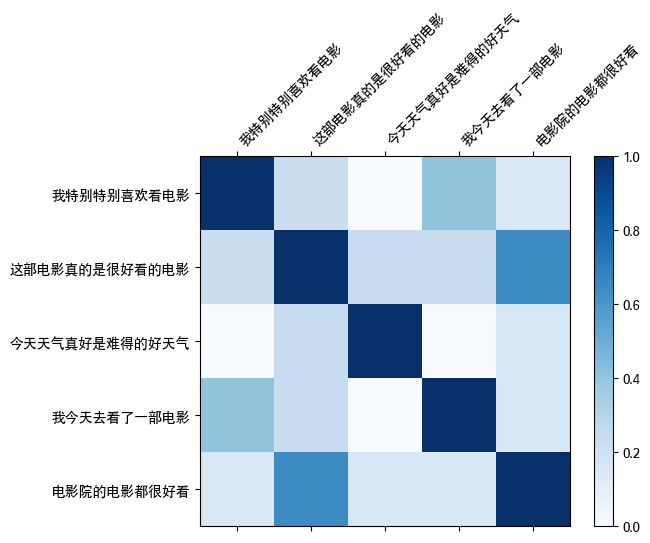

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Hei']
plt.rcParams['font.sans-serif'] = ['Hei']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
cax = ax.matshow(similarity_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticks(range(len(corpus)))
ax.set_yticks(range(len(corpus)))
ax.set_xticklabels(corpus, rotation=45, ha='left')
ax.set_yticklabels(corpus)
plt.show()